# Revenue per Visitor Statistical Significance Calculator
Using mannwhitneyu test

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

In [3]:
df = pd.read_csv('output/SampleRevenueData.csv')
df.describe()

,Control,Variant
count,9767.000000,9726.000000
mean,5.060612,4.063747
std,38.856811,25.932426
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1204.000000,617.000000


<Axes: ylabel='Control'>

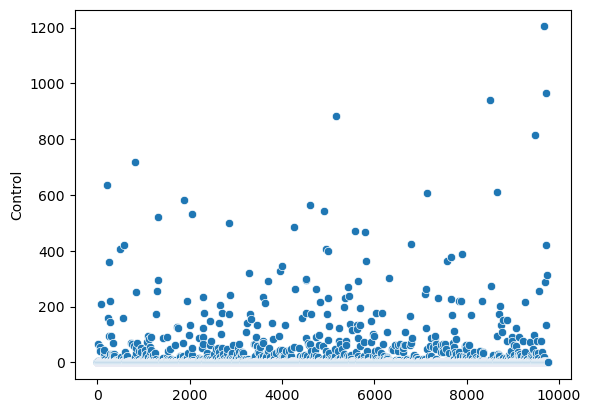

In [4]:
df.columns
sns.scatterplot(data=df.iloc[:, 0])

In [5]:
#The Wilcoxon Rank Sum Test (sometimes called the Mann-Whitney U Test) is a non-parametric test for the null hypothesis that 2 related paired samples come from the same distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

statistic, p_value = mannwhitneyu(df.iloc[:, 0], df.iloc[:, 1], alternative='two-sided', use_continuity=True, nan_policy='omit')

print("Statistic:", statistic)
print(f"Confidence Level: {1 - p_value:.1%}")
print(f"p-value: {p_value:.7f}")



Statistic: 47531253.0
Confidence Level: 13.1%
p-value: 0.8691642


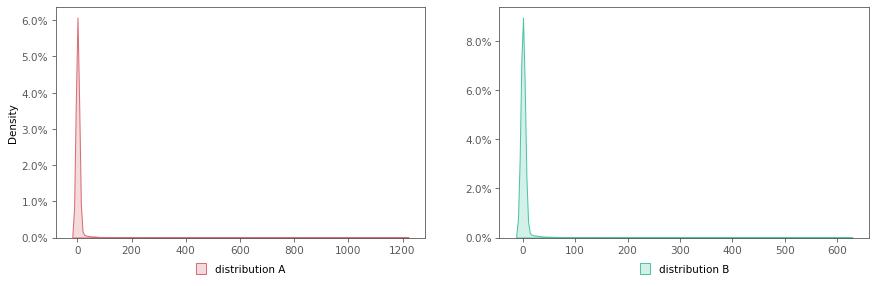

In [6]:
def plot_simulation():

    fig, ax = plt.subplots(1,2, figsize=(14, 4), dpi=75)
    
    sns.kdeplot(df.iloc[:, 0], color="#da6d75", ax=ax[0], fill=True).set(xlabel=None)
    b = sns.kdeplot(df.iloc[:, 1], color="#51c4a8", ax=ax[1], fill=True)
    b.set(xlabel=None)
    b.set(ylabel=None)
    ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax[0].tick_params(axis="y", colors="#595959")
    ax[0].tick_params(axis='x', colors='#595959')
    ax[1].tick_params(axis="y", colors="#595959")
    ax[1].tick_params(axis='x', colors='#595959')
    
    ax[0].legend(labels=["distribution A"], loc = "lower center", bbox_to_anchor=(0.5, -0.2), ncol=1, frameon=False, handleheight=1.25, handlelength=1)
    ax[1].legend(labels=["distribution B"], loc = "lower center", bbox_to_anchor=(0.5, -0.2), ncol=1, frameon=False, handleheight=1.25, handlelength=1)
    
    for spine in ax[0].spines.values():
        spine.set_edgecolor('#595959')
    
    for spine in ax[1].spines.values():
        spine.set_edgecolor('#595959')
    
    # Set grid lines as grey and display behind the plot
    #fig.legend(labels=["distribution A", "distribution B"], loc = "lower center", bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, handleheight=1.25, handlelength=1)
    #fig.tight_layout()

plot_simulation()